In [17]:
%run cone1.py

In [2]:
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Palatino"],
    "font.size": 15
})

In [3]:
from matplotlib import cm

color = cm.get_cmap("RdPu")
oiii_corrs = np.loadtxt("corr")
oiii_corrs_x = np.loadtxt("corr_x_")
corr_min = np.min(oiii_corrs)

In [210]:
corr_min, np.min(cors_x), np.min(cors_s)

(-0.19618814710905794, -0.11526146837055426, -0.1321547374575117)

In [209]:
cors_x = np.loadtxt("../src/cors_x")[0]
cors_s = np.loadtxt("../src/cors_s")[0]

cors_x_err = np.loadtxt("../src/cors_x")[1]
cors_s_err = np.loadtxt("../src/cors_s")[1]

In [161]:
_k = (0.19 - 0.16) / 0.1
_b = 0.16 - 0.2 * _k

In [211]:
0.18 * _k + _b

0.154

In [216]:
tmp = []


for i in range(100):
    data = gen_data_frac(0.5, 0.139, 0.18)

    res = opt.minimize(
        lambda s: target(data, *s), 
        [_a_std, _b_std],
        bounds=opt.Bounds(
            [0, 0],
            [np.inf, np.inf]
        )
    )

    s_a, s_b = res.x
    a, b, angle, sed = data
    c = np.corrcoef(s_a * a + sed + np.log10(angle), s_b * b + sed + np.log10(1-angle))[0, 1]

    # if np.abs(c - corr_min) < 1e-4:
    #     break
    tmp.append(c)

np.mean(tmp)

-0.11703608823943759

In [218]:
fk = 0.173

while True:
    data = gen_data_frac(0.5, 0.139, 0.18)

    res = opt.minimize(
        lambda s: target(data, *s), 
        [_a_std, _b_std],
        bounds=opt.Bounds(
            [0, 0],
            [np.inf, np.inf]
        )
    )

    s_a, s_b = res.x
    a, b, angle, sed = data
    c = np.corrcoef(s_a * a + sed + np.log10(angle), s_b * b + sed + np.log10(1-angle))[0, 1]

    if np.abs(c - np.min(cors_x)) < 1e-4:
        break

In [219]:
np.std(s_a * a + sed + np.log10(angle)), np.std(s_b * b + sed + np.log10(1-angle))

(0.23512181204288599, 0.19884999123657107)

In [220]:
s_b ** 2 / _b_std ** 2

0.1809614601955692

In [183]:
_a_std, _b_std

(0.23511969832958668, 0.1988515228185253)

In [193]:
np.std(angle)

0.14623944010094125

In [197]:
np.std(sed)

0.09895406153407085

In [192]:
s_a**2/_a_std**2, np.std(sed) **2/_a_std**2

(0.4966743413083278, 0.17712881494440508)

In [195]:
np.std(np.log10(angle)) ** 2/ np.std(s_a * a + sed + np.log10(angle))**2, np.std(np.log10(1 - angle)) ** 2 / np.std(s_b * b + sed + np.log10(1-angle))**2

(0.30493870314316823, 0.7667462785480147)

In [196]:
np.std(sed) ** 2/ np.std(s_a * a + sed + np.log10(angle))**2, np.std(sed) ** 2 / np.std(s_b * b + sed + np.log10(1-angle))**2

(0.17712641827619266, 0.24382160683230636)

In [87]:
_a_std, _b_std

(0.23511969832958668, 0.1988515228185253)

In [76]:
np.std(sed)

0.10605228723474878

In [77]:
0.11**2/0.2**2

0.30249999999999994

In [198]:
@np.vectorize
def frac2corrfrac(polar_frac):
    a_ = s_a * a + sed + np.log10(angle)
    b_torus = s_b * b + np.log10(1 - polar_frac) + sed + np.log10(1 - angle)
    b_polar = s_a * a + np.log10(polar_frac) + sed + np.log10(angle)
    b_ = np.log10(10 ** b_torus + 10 ** b_polar)
    frac = 10**np.mean(b_polar - b_)
    return [np.corrcoef(a_, b_)[0, 1], frac]

In [199]:
from scipy.interpolate import CubicSpline

f = np.linspace(0,1)
res = np.array([frac2corrfrac(f) for f in f])
frac = res[:,1]
corr = res[:,0]
frac2corr = CubicSpline(frac, corr)

<ipython-input-198-7af2a77eb555>:5: RuntimeWarning: divide by zero encountered in log10
  b_polar = s_a * a + np.log10(polar_frac) + sed + np.log10(angle)
<ipython-input-198-7af2a77eb555>:4: RuntimeWarning: divide by zero encountered in log10
  b_torus = s_b * b + np.log10(1 - polar_frac) + sed + np.log10(1 - angle)


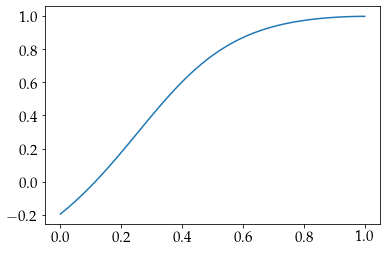

In [200]:
plt.plot(frac, corr)

In [206]:
cors_std = np.loadtxt("../src/cors_std")

In [207]:
corr2frac = CubicSpline(corr1, frac1)
frac = corr2frac1(oiii_corrs)
frac_up = corr2frac0(oiii_corrs + cors_std)
frac_low = corr2frac0(oiii_corrs - cors_std)

In [202]:
frac_ = np.loadtxt("frac0")

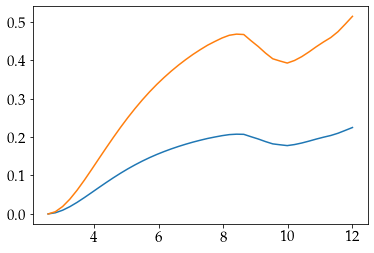

In [204]:
plt.plot(np.linspace(1, 12)[7:], frac[7:])
plt.plot(np.linspace(1, 12)[7:], frac_[7:])

In [208]:
np.savetxt("case_b_hc", [frac, frac_up, frac_low])